In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
movie_reviews = pd.read_csv("fandango_score_comparison.csv")

In [2]:
movie_reviews.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


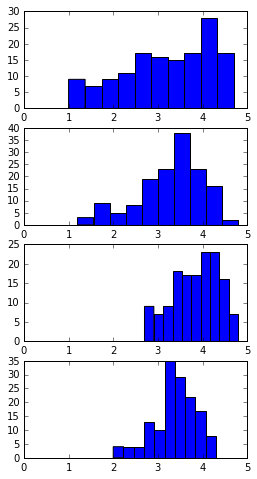

In [3]:
fig = plt.figure(figsize=(4,8))

ax1 = fig.add_subplot(4, 1, 1)
ax1.set_xlim(0, 5)
ax1.hist(movie_reviews["RT_user_norm"])

ax2 = fig.add_subplot(4, 1, 2)
ax2.set_xlim(0, 5)
ax2.hist(movie_reviews["Metacritic_user_nom"])

ax3 = fig.add_subplot(4, 1, 3)
ax3.set_xlim(0, 5)
ax3.hist(movie_reviews["Fandango_Ratingvalue"])

ax4 = fig.add_subplot(4, 1, 4)
ax4.set_xlim(0, 5)
ax4.hist(movie_reviews["IMDB_norm"])

plt.show()

In [4]:
def calc_mean(s):
    return sum(s.values) / len(s.values)

In [5]:
user_reviews = movie_reviews[["RT_user_norm", "Metacritic_user_nom", "Fandango_Ratingvalue", "IMDB_norm"]]

In [6]:
x, y, z, a = user_reviews.apply(calc_mean)

In [7]:
x

3.1938356164383572

In [8]:
def calc_mean(series):
    vals = series.values
    mean = sum(vals) / len(vals)
    return mean

def calc_variance(series):
    series_mean = calc_mean(series)
    variance = 0
    for val in series:
        diff = val - series_mean
        variance += diff ** 2
    return variance / len(series)

In [9]:
calc_variance(movie_reviews["RT_user_norm"])

0.99557843873146901

In [10]:
movie_reviews["RT_user_norm"].var()

1.0024444969296173

In [11]:
def calc_variance(series):
    series_mean = calc_mean(series)
    diffs = series - series_mean
    sq_diffs = diffs ** 2
    variance = sq_diffs.sum() / len(series)
    return variance 

In [12]:
calc_variance(movie_reviews["RT_user_norm"])

0.99557843873146923

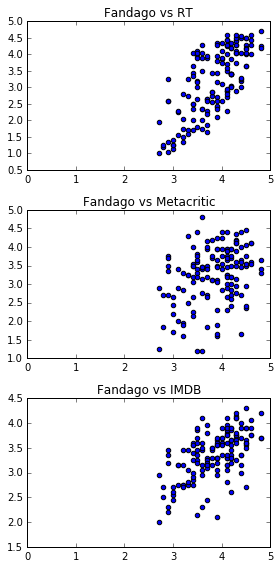

In [18]:
fig = plt.figure(figsize=(4,8))

ax1 = fig.add_subplot(3, 1, 1)
ax1.set_xlim(0, 5)
ax1.scatter(movie_reviews["Fandango_Ratingvalue"], movie_reviews["RT_user_norm"])
ax1.set_title("Fandago vs RT")

ax2 = fig.add_subplot(3, 1, 2)
ax2.set_xlim(0, 5)
ax2.scatter(movie_reviews["Fandango_Ratingvalue"], movie_reviews["Metacritic_user_nom"])
ax2.set_title("Fandago vs Metacritic")

ax3 = fig.add_subplot(3, 1, 3)
ax3.set_xlim(0, 5)
ax3.scatter(movie_reviews["Fandango_Ratingvalue"], movie_reviews["IMDB_norm"])
ax3.set_title("Fandago vs IMDB")

plt.tight_layout()
plt.show()

In [19]:
def calc_mean(series):
    vals = series.values
    mean = sum(vals) / len(vals)
    return mean
    
def calc_covariance(series1, series2):
    s1_mean = calc_mean(series1)
    s2_mean = calc_mean(series2)
    
    s1_diffs = series1 - s1_mean
    s2_diffs = series2 - s2_mean
    
    diffs_prod = s1_diffs * s2_diffs
    
    covariance = diffs_prod.sum() / len(diffs_prod)
    
    return covariance

calc_covariance(movie_reviews["RT_user_norm"], movie_reviews["Fandango_Ratingvalue"])

0.36216222555826605

In [20]:
movie_reviews["RT_user_norm"].cov(movie_reviews["Fandango_Ratingvalue"])

0.36465989607935756

In [21]:
def calc_mean(series):
    vals = series.values
    mean = sum(vals) / len(vals)
    return mean

def calc_variance(series):
    mean = calc_mean(series)
    squared_deviations = (series - mean)**2
    mean_squared_deviations = calc_mean(squared_deviations)
    return mean_squared_deviations

def calc_covariance(series_one, series_two):
    x = series_one.values
    y = series_two.values
    x_mean = calc_mean(series_one)
    y_mean = calc_mean(series_two)
    x_diffs = [i - x_mean for i in x]
    y_diffs = [i - y_mean for i in y]
    codeviates = [x_diffs[i] * y_diffs[i] for i in range(len(x))]
    return sum(codeviates) / len(codeviates)

rt_fg_covar = calc_covariance(movie_reviews["RT_user_norm"], movie_reviews["Fandango_Ratingvalue"])
mc_fg_covar = calc_covariance(movie_reviews["Metacritic_user_nom"], movie_reviews["Fandango_Ratingvalue"])
id_fg_covar = calc_covariance(movie_reviews["IMDB_norm"], movie_reviews["Fandango_Ratingvalue"])

In [30]:
rt_fg_covar, mc_fg_covar, id_fg_covar

(0.36216222555826588, 0.1271007693751173, 0.14371880277725671)

In [31]:
def calc_correlation(series_one, series_two):
    std_dev_one = calc_variance(series_one) ** (1/2)
    std_dev_two = calc_variance(series_two) ** (1/2)
    covariance = calc_covariance(series_one, series_two)
    correlation = covariance / (std_dev_one * std_dev_two)
    return correlation


In [32]:
calc_correlation(movie_reviews["RT_user_norm"], movie_reviews["Fandango_Ratingvalue"])

0.72432899424931385

In [33]:
rt_fg_corr = calc_correlation(movie_reviews["RT_user_norm"], movie_reviews["Fandango_Ratingvalue"])
mc_fg_corr = calc_correlation(movie_reviews["Metacritic_user_nom"], movie_reviews["Fandango_Ratingvalue"])
id_fg_corr = calc_correlation(movie_reviews["IMDB_norm"], movie_reviews["Fandango_Ratingvalue"])

In [34]:
rt_fg_corr, mc_fg_corr, id_fg_corr

(0.72432899424931385, 0.33694531426494839, 0.60035417726263651)

In [35]:
import numpy as np
np.cov(movie_reviews["RT_user_norm"], movie_reviews["Fandango_Ratingvalue"])

array([[ 1.0024445 ,  0.3646599 ],
       [ 0.3646599 ,  0.25283892]])

In [36]:
np.corrcoef(movie_reviews["RT_user_norm"], movie_reviews["Fandango_Ratingvalue"])

array([[ 1.        ,  0.72432899],
       [ 0.72432899,  1.        ]])